In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [5]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
        X.std() / 2
    x_min, x_max = x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [20]:
def show_metrics(prediction, y_test, classifier, X, y):
    prediction = knn.predict(X_test)
    print("Prediction: ", prediction)
    print("True: ", y_test)

    print("Confusion matrix: \n", confusion_matrix(y_test, prediction))
    print('Accuracy score: ', accuracy_score(prediction, y_test))
    print(classification_report(y_test, prediction))

    roc_auc_score(y_test, prediction)

    plt.xlabel("first feature")
    plt.ylabel("second feature")
    
    print("AUC ROC: ", roc_auc_score(y_test, prediction))
    
    plot_2d_separator(knn, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
    plt.show()

[[ 0.24466644  0.86610506]
 [ 1.01528017 -0.37900557]
 [ 1.47476623 -0.15216309]
 [ 0.61469792 -0.45972114]
 [ 1.15479494 -0.03500654]
 [-1.19979695  1.23153065]
 [ 0.91064492 -0.53652016]
 [-0.44027146 -0.02551324]
 [ 0.54895243  1.06247059]
 [ 0.48786546  0.93335336]
 [ 1.12844913 -0.69976443]
 [-0.16531888  0.91036123]
 [ 1.27475831 -0.36697646]
 [ 1.71142978 -0.77879111]
 [ 1.93306177  0.08089445]]
[0 1 1 1 1 0 0 1 0 0 1 0 1 1 1]


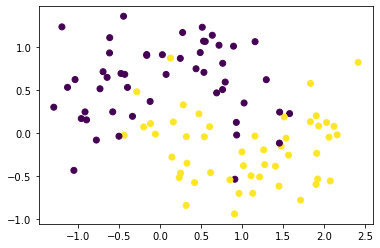

In [7]:
X, y = make_moons(noise=0.3, random_state=23)
print(X[:15])
print(y[:15])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

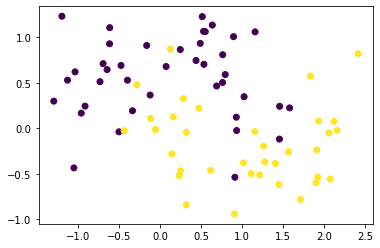

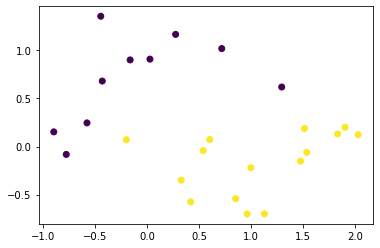

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

n_neightbors =  1
Prediction:  [0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[ 9  1]
 [ 5 10]]
Accuracy score:  0.76
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.91      0.67      0.77        15

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

AUC ROC:  0.7833333333333333


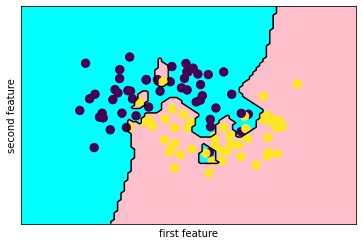

n_neightbors =  3
Prediction:  [0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 2 13]]
Accuracy score:  0.92
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

AUC ROC:  0.9333333333333333


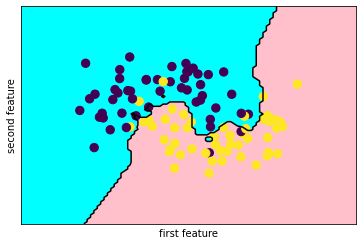

n_neightbors =  5
Prediction:  [0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 3 12]]
Accuracy score:  0.88
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.80      0.89        15

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25

AUC ROC:  0.9


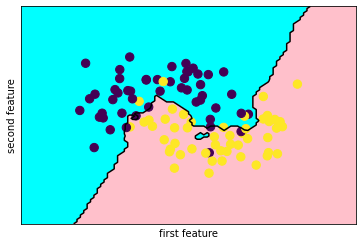

n_neightbors =  9
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


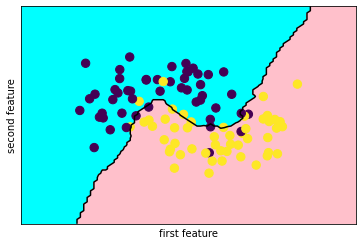

In [21]:
neighbors = [1, 3, 5, 9]
for n in neighbors:  
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    print("n_neightbors = ", n)
    show_metrics(prediction, y_test, knn, X, y)

Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


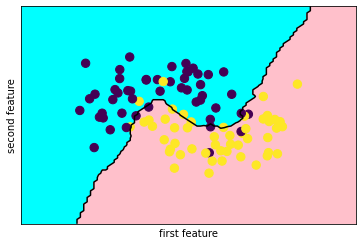

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

show_metrics(prediction, y_test, gnb, X, y)

n_estimators =  5
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


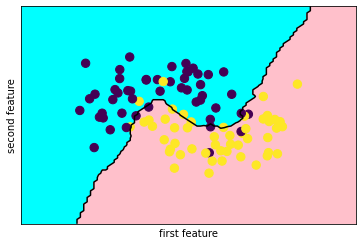

n_estimators =  10
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


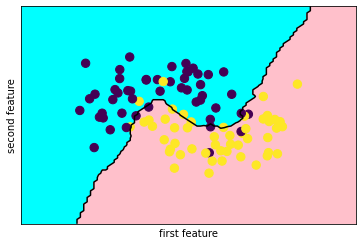

n_estimators =  15
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


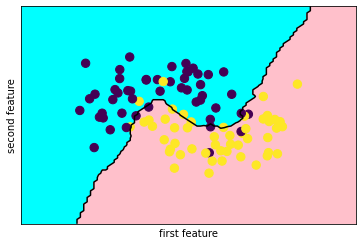

n_estimators =  20
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


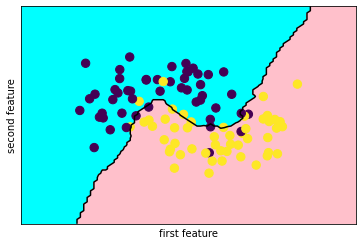

n_estimators =  50
Prediction:  [1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
True:  [1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1]
Confusion matrix: 
 [[10  0]
 [ 1 14]]
Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

AUC ROC:  0.9666666666666667


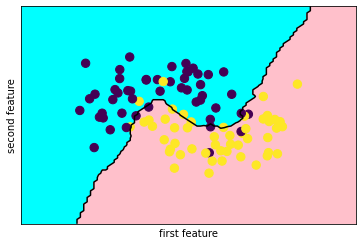

In [23]:
estimators = [5, 10, 15, 20, 50]
for e in estimators:  
    rf = RandomForestClassifier(n_estimators=e)
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_test)
    print("n_estimators = ", e)
    show_metrics(prediction, y_test, rf, X, y)